In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/ColabNotebooks/Lec2_datasets/'

/content/drive/MyDrive/ColabNotebooks/Lec2_datasets


In [4]:
import torch
import torch.nn as nn
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable
import torchvision.transforms as transforms

#reading image
#imsize = [512,512] if torch.cuda.is_available() else [128,128] # use small size if no gpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# loader = transforms.Compose([
#     transforms.ToTensor()])  # transform it into a torch tensor

### Nhắc lại lý thuyết

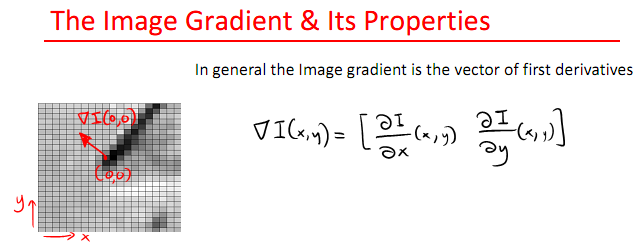

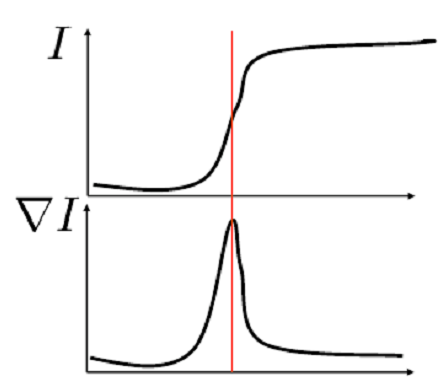

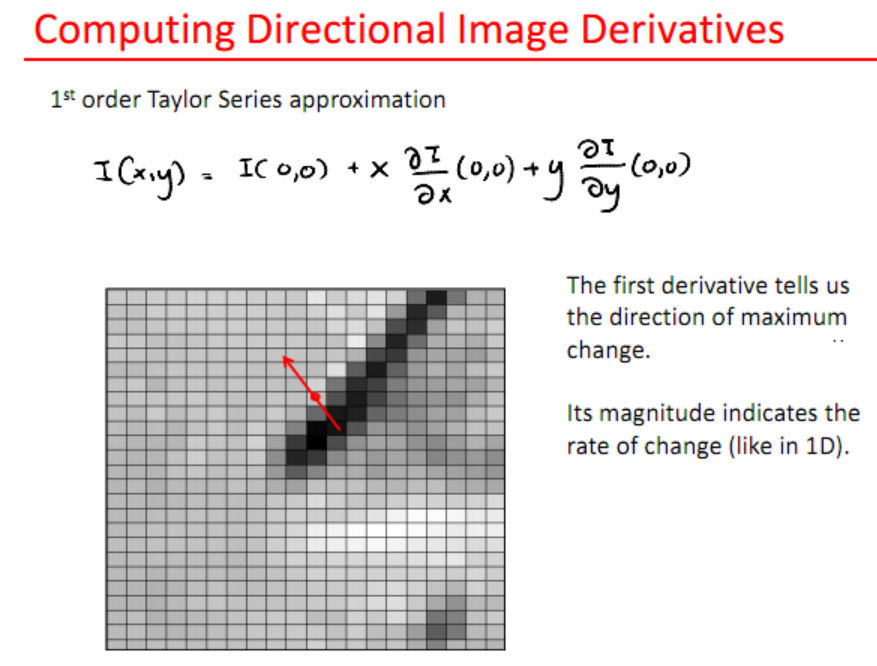

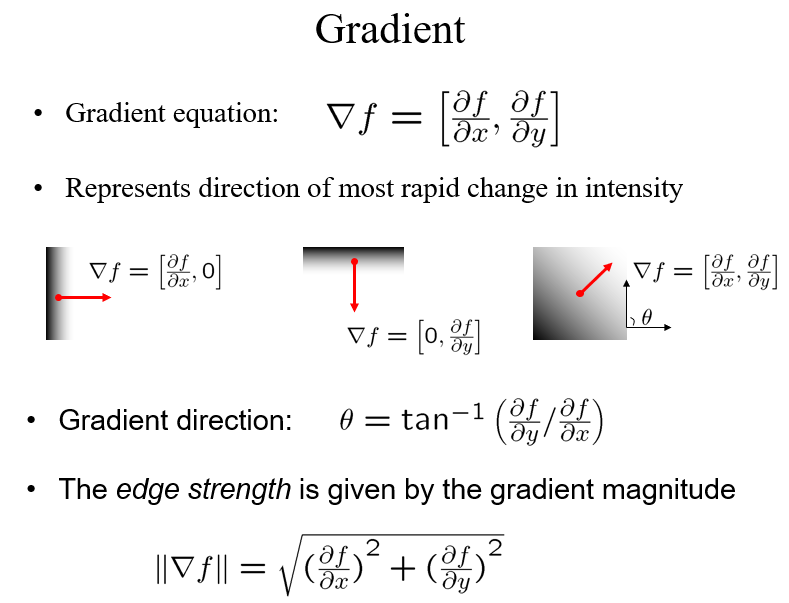

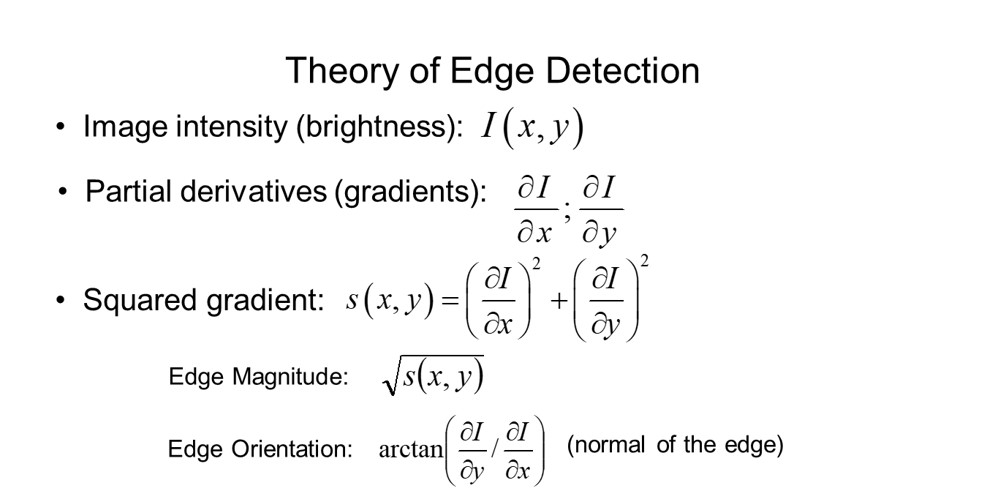

Do tính đạo hàm bậc nhất rất nhạy với nhiễu, cần thực hiện smoothing trước khi lấy gradient

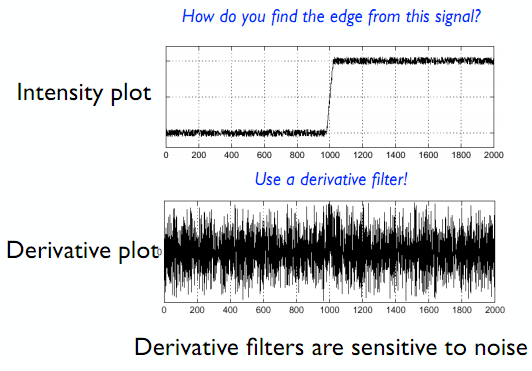

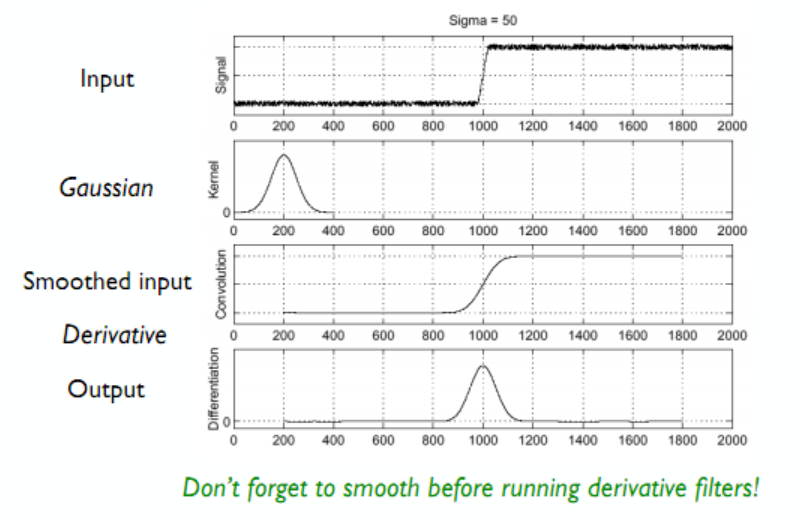

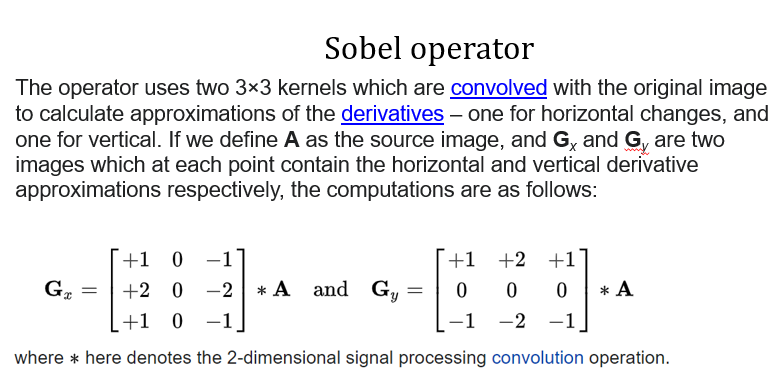

In [5]:
#compute image gradient (Using Sobel operator)
def gradient_img(img):
    img = img.squeeze(0)
    ten=torch.unbind(img)#Removes a tensor dimension. Returns a tuple of all slices along a given dimension
    x=ten[0].unsqueeze(0).unsqueeze(0)
    
    a=np.array([[1, 0, -1],[2,0,-2],[1,0,-1]]) #Sobel operator: x axis
    conv1=nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=1, bias=False)      #smoothing 
    conv1.weight=nn.Parameter(torch.from_numpy(a).float().unsqueeze(0).unsqueeze(0))
    G_x=conv1(Variable(x)).data.view(1,x.shape[2],x.shape[3])

    b=np.array([[1, 2, 1],[0,0,0],[-1,-2,-1]])#Sobel operator: y axis
    conv2=nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=1, bias=False)
    conv2.weight=nn.Parameter(torch.from_numpy(b).float().unsqueeze(0).unsqueeze(0))
    G_y=conv2(Variable(x)).data.view(1,x.shape[2],x.shape[3])

    G=torch.sqrt(torch.pow(G_x,2)+ torch.pow(G_y,2))
    return G

In [16]:
import torchvision.transforms.functional as TF
from PIL import Image
# image = Image.open(image_path)
image_PIL = Image.open("/content/drive/MyDrive/ColabNotebooks/Lec2_datasets/images/hust.png").convert('RGB')
image_ts_PIL= TF.to_tensor(image_PIL)


In [17]:
image_ts_PIL.size()

torch.Size([3, 628, 1200])

In [18]:
grad = gradient_img(image_ts_PIL)

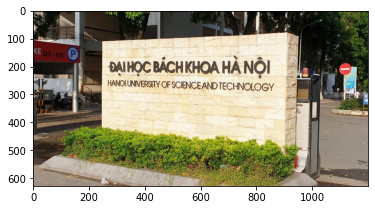

In [19]:
plt.figure()
plt.imshow(image_ts_PIL.permute(1,2,0))

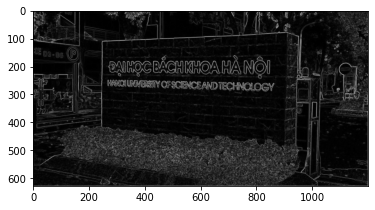

In [20]:
plt.imshow(grad.permute(1,2,0)[:,:,0],cmap='gray')

In [21]:
import torchvision.transforms.functional as TF
from PIL import Image
# image = Image.open(image_path)
# image_PIL = Image.open("ezreal.jpg")
image_PIL = Image.open("/content/drive/MyDrive/ColabNotebooks/Lec2_datasets/images/ezreal.jpg").convert('RGB')
image_ts_PIL= TF.to_tensor(image_PIL)
grad = gradient_img(image_ts_PIL)

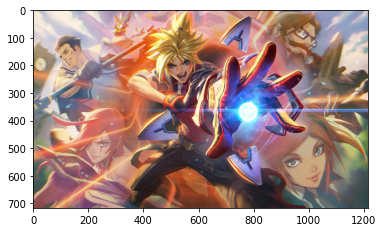

In [22]:
plt.imshow(image_ts_PIL.permute(1,2,0))

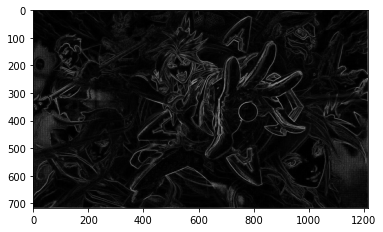

In [23]:
plt.imshow(grad.permute(1,2,0)[:,:,0],cmap='gray')

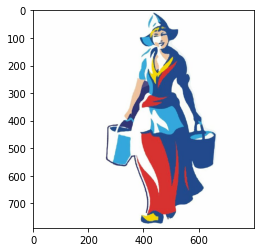

In [24]:
image_PIL = Image.open("/content/drive/MyDrive/ColabNotebooks/Lec2_datasets/images/cogaihalan.jpg").convert('RGB')  #ảnh grayscale cần chuyển sang RGB
image_ts_PIL= TF.to_tensor(image_PIL)
image_ts_PIL.size()
plt.imshow(image_ts_PIL.permute(1,2,0))

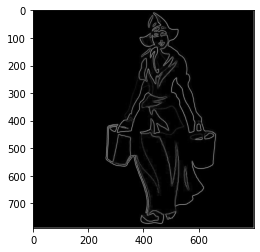

In [25]:
grad = gradient_img(image_ts_PIL)  
plt.imshow(grad.permute(1,2,0)[:,:,0],cmap='gray')

### Quan sát theo từng lệnh của hàm image_gradient

In [ ]:
# img = img.squeeze(0)
# ten=torch.unbind(img)#Removes a tensor dimension. Returns a tuple of all slices along a given dimension
# x=ten[0].unsqueeze(0).unsqueeze(0)
    
# a=np.array([[1, 0, -1],[2,0,-2],[1,0,-1]])
# conv1=nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=1, bias=False)
# conv1.weight=nn.Parameter(torch.from_numpy(a).float().unsqueeze(0).unsqueeze(0))
# G_x=conv1(Variable(x)).data.view(1,x.shape[2],x.shape[3])

# b=np.array([[1, 2, 1],[0,0,0],[-1,-2,-1]])
# conv2=nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=1, bias=False)
# conv2.weight=nn.Parameter(torch.from_numpy(b).float().unsqueeze(0).unsqueeze(0))
# G_y=conv2(Variable(x)).data.view(1,x.shape[2],x.shape[3])

# G=torch.sqrt(torch.pow(G_x,2)+ torch.pow(G_y,2))

Ảnh đầu vào f(x,y)

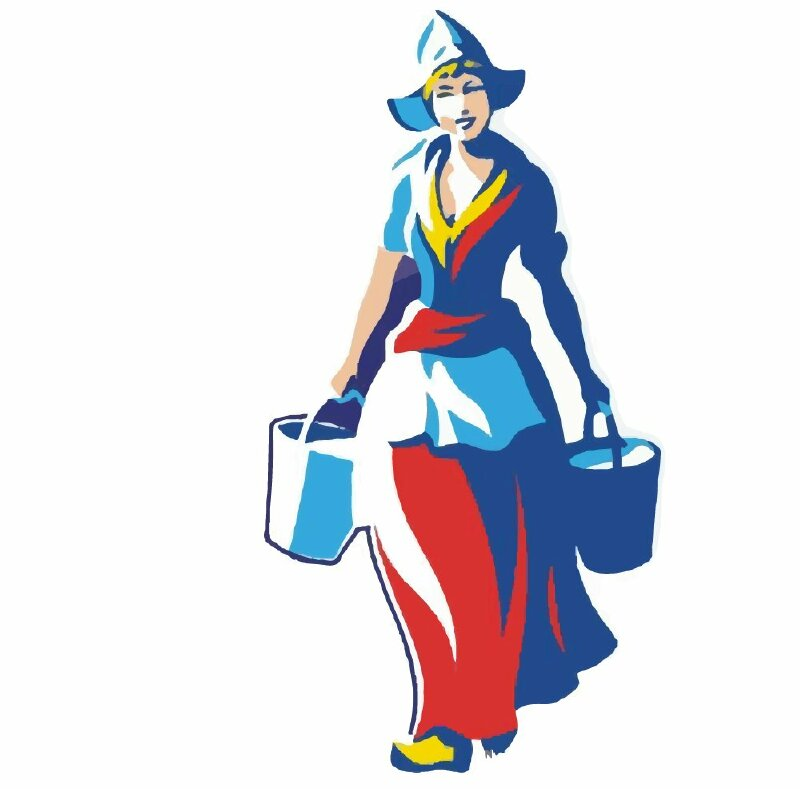

In [26]:
image_PIL = Image.open("/content/drive/MyDrive/ColabNotebooks/Lec2_datasets/images/cogaihalan.jpg").convert('RGB')
image_ts_PIL= TF.to_tensor(image_PIL)

img=image_ts_PIL

img.size()

torch.Size([3, 789, 800])

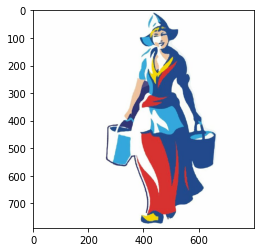

In [27]:
plt.imshow(image_ts_PIL.permute(1,2,0))

In [28]:
# img = img.squeeze(0)
# img.size()

In [29]:
ten=torch.unbind(img)

In [30]:
print(ten[0].size(),ten[1].size(),ten[2].size())

torch.Size([789, 800]) torch.Size([789, 800]) torch.Size([789, 800])


In [31]:
x=ten[0].unsqueeze(0)
x.shape

torch.Size([1, 789, 800])

In [32]:
x=ten[0].unsqueeze(0).unsqueeze(0)
x.shape

torch.Size([1, 1, 789, 800])

In [33]:
x=ten[1].unsqueeze(0).unsqueeze(0)
x.shape

torch.Size([1, 1, 789, 800])

### Tính gradient theo các trục

## Tính Gradient theo các trục

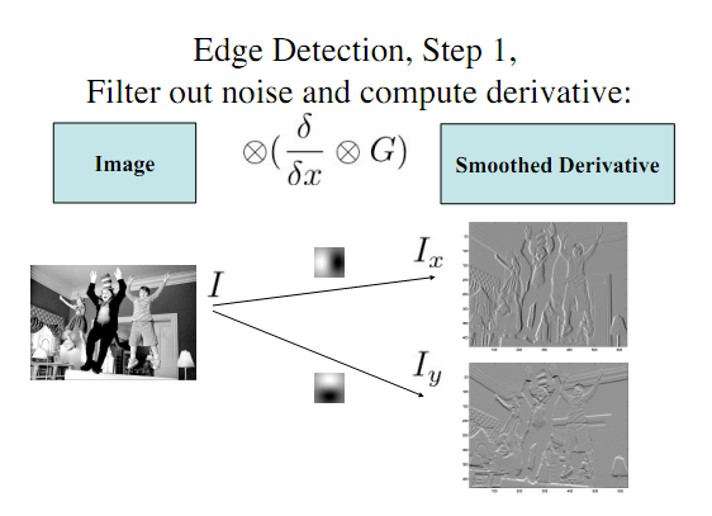

### Tính gradient theo trục x: Gx=(df/dx)*G

In [34]:
a=np.array([[1, 0, -1],[2,0,-2],[1,0,-1]])
conv1=nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=1, bias=False)
conv1.weight=nn.Parameter(torch.from_numpy(a).float().unsqueeze(0).unsqueeze(0))
G_x=conv1(Variable(x)).data.view(1,x.shape[2],x.shape[3])

In [35]:
a

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

In [36]:
conv1

Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)

In [37]:
conv1.weight

Parameter containing:
tensor([[[[ 1.,  0., -1.],
          [ 2.,  0., -2.],
          [ 1.,  0., -1.]]]], requires_grad=True)

In [38]:
G_x.shape

torch.Size([1, 789, 800])

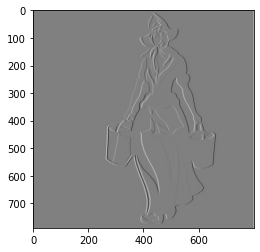

In [39]:
plt.imshow(G_x.permute(1,2,0)[:,:,0],cmap='gray')

### Tính gradient theo trục y: Gy=(df/dy)*G

In [40]:
b=np.array([[1, 2, 1],[0,0,0],[-1,-2,-1]])
conv2=nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=1, bias=False)
conv2.weight=nn.Parameter(torch.from_numpy(b).float().unsqueeze(0).unsqueeze(0))
G_y=conv2(Variable(x)).data.view(1,x.shape[2],x.shape[3])

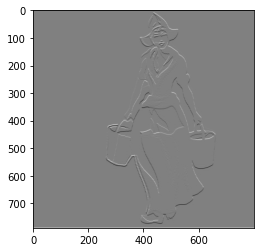

In [41]:
plt.imshow(G_y.permute(1,2,0)[:,:,0],cmap='gray')

### Tính gradient magnitude

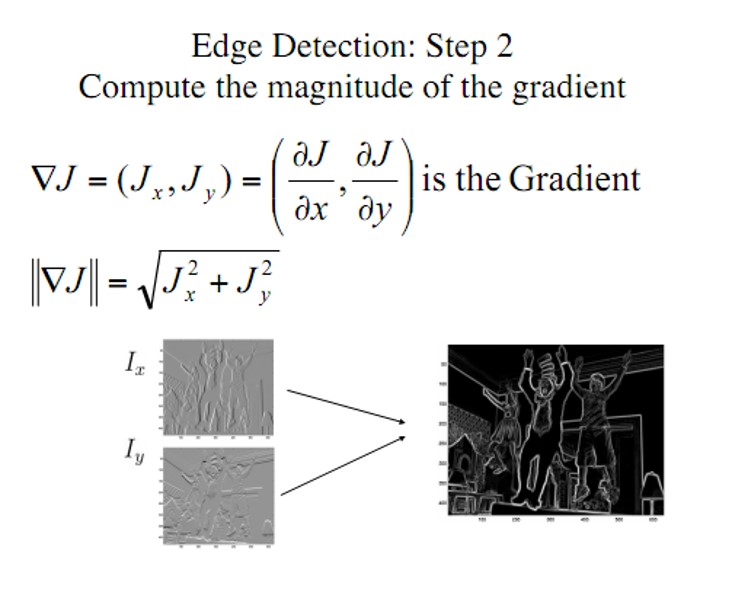

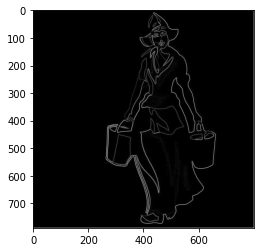

In [42]:
G=torch.sqrt(torch.pow(G_x,2)+ torch.pow(G_y,2))
plt.imshow(G.permute(1,2,0)[:,:,0],cmap='gray')

### Thử ảnh khác

In [43]:
image_PIL = Image.open("/content/drive/MyDrive/ColabNotebooks/Lec2_datasets/images/ezreal.jpg")
image_ts_PIL= TF.to_tensor(image_PIL)

img=image_ts_PIL

img.size()


torch.Size([3, 717, 1215])

In [44]:
img = img.squeeze(0)
ten=torch.unbind(img)#Removes a tensor dimension. Returns a tuple of all slices along a given dimension
x=ten[0].unsqueeze(0).unsqueeze(0)
    
a=np.array([[1, 0, -1],[2,0,-2],[1,0,-1]])
conv1=nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=1, bias=False)
conv1.weight=nn.Parameter(torch.from_numpy(a).float().unsqueeze(0).unsqueeze(0))
G_x=conv1(Variable(x)).data.view(1,x.shape[2],x.shape[3])

b=np.array([[1, 2, 1],[0,0,0],[-1,-2,-1]])
conv2=nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=1, bias=False)
conv2.weight=nn.Parameter(torch.from_numpy(b).float().unsqueeze(0).unsqueeze(0))
G_y=conv2(Variable(x)).data.view(1,x.shape[2],x.shape[3])

G=torch.sqrt(torch.pow(G_x,2)+ torch.pow(G_y,2))
Gx_1=G_x
Gy_1=G_y
G_1=G

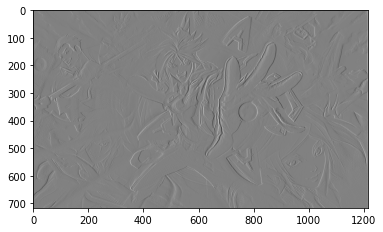

In [45]:
plt.imshow(G_x.permute(1,2,0)[:,:,0],cmap='gray')

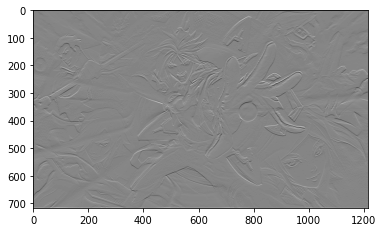

In [46]:
plt.imshow(G_y.permute(1,2,0)[:,:,0],cmap='gray')

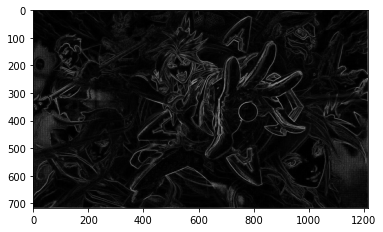

In [47]:
plt.imshow(G.permute(1,2,0)[:,:,0],cmap='gray')

In [48]:
img = img.squeeze(0)
ten=torch.unbind(img)#Removes a tensor dimension. Returns a tuple of all slices along a given dimension
# x=ten[0].unsqueeze(0).unsqueeze(0) #
x=ten[1].unsqueeze(0).unsqueeze(0) # thử xem lấy kênh 2 xem khác gì không?

a=np.array([[1, 0, -1],[2,0,-2],[1,0,-1]])
conv1=nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=1, bias=False)
conv1.weight=nn.Parameter(torch.from_numpy(a).float().unsqueeze(0).unsqueeze(0))
G_x=conv1(Variable(x)).data.view(1,x.shape[2],x.shape[3])

b=np.array([[1, 2, 1],[0,0,0],[-1,-2,-1]])
conv2=nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=1, bias=False)
conv2.weight=nn.Parameter(torch.from_numpy(b).float().unsqueeze(0).unsqueeze(0))
G_y=conv2(Variable(x)).data.view(1,x.shape[2],x.shape[3])

G=torch.sqrt(torch.pow(G_x,2)+ torch.pow(G_y,2))
Gx_2=G_x
Gy_2=G_y
G_2=G

In [49]:
img = img.squeeze(0)
ten=torch.unbind(img)#Removes a tensor dimension. Returns a tuple of all slices along a given dimension
# x=ten[0].unsqueeze(0).unsqueeze(0) #   
x=ten[2].unsqueeze(0).unsqueeze(0) # thử xem lấy kênh 3 xem khác gì không?

a=np.array([[1, 0, -1],[2,0,-2],[1,0,-1]])
conv1=nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=1, bias=False)
conv1.weight=nn.Parameter(torch.from_numpy(a).float().unsqueeze(0).unsqueeze(0))
G_x=conv1(Variable(x)).data.view(1,x.shape[2],x.shape[3])

b=np.array([[1, 2, 1],[0,0,0],[-1,-2,-1]])
conv2=nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=1, bias=False)
conv2.weight=nn.Parameter(torch.from_numpy(b).float().unsqueeze(0).unsqueeze(0))
G_y=conv2(Variable(x)).data.view(1,x.shape[2],x.shape[3])

G=torch.sqrt(torch.pow(G_x,2)+ torch.pow(G_y,2))
Gx_3=G_x
Gy_3=G_y
G_3=G

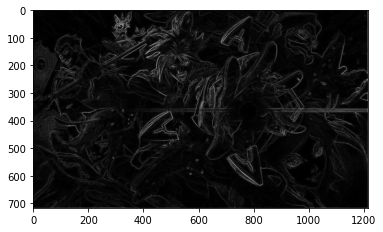

In [50]:
plt.imshow(G.permute(1,2,0)[:,:,0],cmap='gray')

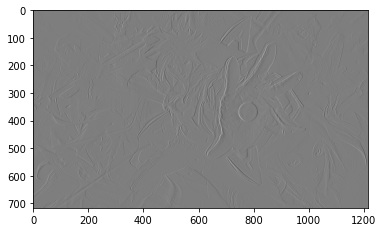

In [51]:
plt.imshow((Gx_2-Gx_1).permute(1,2,0)[:,:,0],cmap='gray')

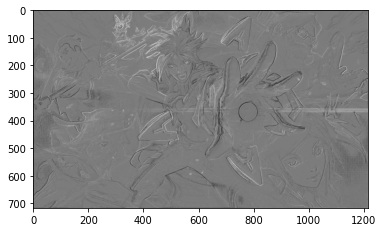

In [52]:
plt.imshow((G_3-G_1).permute(1,2,0)[:,:,0],cmap='gray')

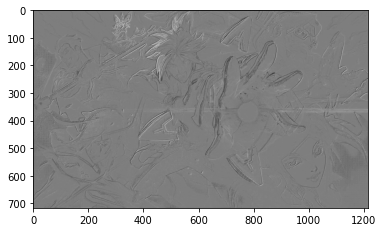

In [53]:
plt.imshow((G_3-G_2).permute(1,2,0)[:,:,0],cmap='gray')

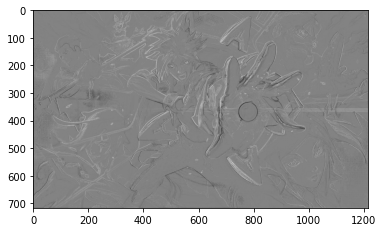

In [54]:
plt.imshow((G_2-G_1).permute(1,2,0)[:,:,0],cmap='gray')

Thử với noise image

In [55]:
image_PIL = Image.open("/content/drive/MyDrive/ColabNotebooks/Lec2_datasets/images/img_noise.jpg")
image_ts_PIL= TF.to_tensor(image_PIL)

img=image_ts_PIL

img.size()

torch.Size([3, 276, 289])

In [56]:
img = img.squeeze(0)
ten=torch.unbind(img)#Removes a tensor dimension. Returns a tuple of all slices along a given dimension
x=ten[0].unsqueeze(0).unsqueeze(0)
    
a=np.array([[1, 0, -1],[2,0,-2],[1,0,-1]])
conv1=nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=1, bias=False)
conv1.weight=nn.Parameter(torch.from_numpy(a).float().unsqueeze(0).unsqueeze(0))
G_x=conv1(Variable(x)).data.view(1,x.shape[2],x.shape[3])

b=np.array([[1, 2, 1],[0,0,0],[-1,-2,-1]])
conv2=nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=1, bias=False)
conv2.weight=nn.Parameter(torch.from_numpy(b).float().unsqueeze(0).unsqueeze(0))
G_y=conv2(Variable(x)).data.view(1,x.shape[2],x.shape[3])

G=torch.sqrt(torch.pow(G_x,2)+ torch.pow(G_y,2))
Gx_1=G_x
Gy_1=G_y
G_1=G

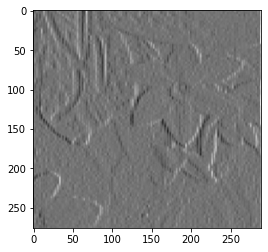

In [57]:
plt.imshow(G_x.permute(1,2,0)[:,:,0],cmap='gray')

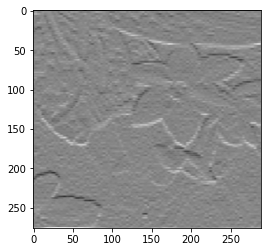

In [58]:
plt.imshow(G_y.permute(1,2,0)[:,:,0],cmap='gray')

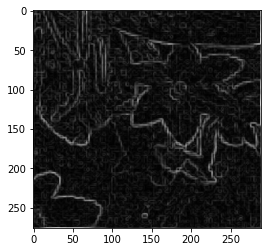

In [59]:
plt.imshow(G.permute(1,2,0)[:,:,0],cmap='gray')

End